# Network Project

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random

## Importing Dataset (As Directed Graph)

In [2]:
# Make sure you have imported Networkx and Pandas

nodes_df = pd.read_csv("nodes.csv")  # contains node IDs and metadata
edges_df = pd.read_csv("edges.csv")  # contains source/target

node_columns = ['index', 'sex', 'race', 'grade', 'school', '_pos']
edge_columns = ['source', 'target', 'activites']

nodes_df.columns = node_columns
edges_df.columns = edge_columns

G = nx.DiGraph() #It was directed graph but we say treat it as undirected

for _, row in nodes_df.iterrows():
    node_id = row['index']
    attr = row.to_dict()
    G.add_node(node_id, **attr)
    
for _, row in edges_df.iterrows():
    src = row['source']
    target = row['target']
    attr = row.drop(['source', 'target']).to_dict()
    G.add_edge(src, target, **attr)

In [ ]:
break

## Visualisation

In [ ]:
nx.draw(G)

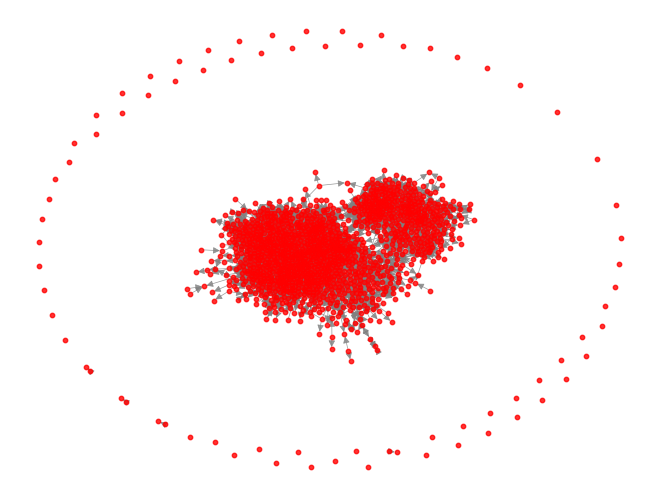

In [3]:

positions = nodes_df['_pos'].to_dict()

pos = {}
for node, string_val in positions.items():
    # Extract numbers from string and convert to list
    nums = string_val.strip('array([])').split(',')
    pos[node] = [float(x.strip()) for x in nums]

nx.draw(G, pos=pos,
        # NODES
    node_size=10,              # Single value or list per node
    node_color='red',     # Color name, hex, or list per node
    node_shape='o',             # 'o', 's', '^', 'v', '<', '>', 'd', etc.
    
    # EDGES
    edge_color='gray',          # Color or list per edge
    width=0.5,                  # Edge width, single or list per edge
    style='solid',              # 'solid', 'dashed', 'dotted', 'dashdot'
    
    # GENERAL
    alpha=0.8,                  # Transparency (0-1)
    with_labels=False,           # Show node labels
    font_size=10,               # Label font size
    font_color='black',         # Label color
    font_weight='normal',
        )

# plt.savefig('snapshots/network_messy.png', 
#     dpi=300,              # Higher resolution (default is 100)
#     bbox_inches='tight',  # Remove extra whitespace
#     transparent=False,     # Transparent background
#     format='png'          # 'png', 'pdf', 'svg', 'jpg'
# )

## Innitial statistics (DiGraph)

Degree, self loops, isolated nodes, number of edges and nodes

In [ ]:
print (f'Number of edges: {G.number_of_edges()}')
print (f'Number of nodes: {G.number_of_nodes()}')

print("Isolated nodes:", len(list(nx.isolates(G))))
print("Self-loops:", nx.number_of_selfloops(G))

print (f'Average degree: {np.mean([k for n,k in G.degree()]) }')

avg_in_deg = sum(dict(G.in_degree()).values()) / G.number_of_nodes()  #print (f'Average in degree: {np.mean([k for n,k in G.in_degree()]) }')
avg_out_deg = sum(dict(G.out_degree()).values()) / G.number_of_nodes()
avg_deg = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"Avg in-degree: {avg_in_deg:.2f}, Avg out-degree: {avg_out_deg:.2f}, Avg degree: {avg_deg:.2f}")

recip = nx.reciprocity(G)   #This measures the proportion of edges that are reciprocated
print(f"Reciprocity: {recip:.2f}") #About 40% of friendship nominations are mutual


triad = nx.triadic_census(G)    #This gives counts of all 16 types of triads in directed graph
print(triad)
#Most social structure is dyadic (pairs) rather than large cliques.


Number of edges: 4849
Number of nodes: 1460
Isolated nodes: 67
Self-loops: 0
Average degree: 6.642465753424657
Avg in-degree: 3.32, Avg out-degree: 3.32, Avg degree: 6.64
Reciprocity: 0.40
{'003': 511997247, '012': 4195800, '102': 1409510, '021D': 3476, '021U': 3941, '021C': 4716, '111D': 3656, '111U': 3223, '030T': 363, '030C': 14, '201': 937, '120D': 222, '120U': 263, '120C': 132, '210': 348, '300': 172}


Undirected graph from now on

## Degree distribution

In [13]:
#get the degree of each node using the provided documentation

degree_counts = nx.degree_histogram(G)
print(degree_counts)
                            # Example output (depending on your graph): [0, 0, 2, 2, 1]
                            # This means: 0 nodes with degree 0, 0 nodes with degree 1

[67, 93, 114, 114, 102, 134, 136, 140, 124, 99, 80, 62, 48, 46, 34, 16, 19, 8, 9, 5, 5, 3, 1, 0, 1]


In [15]:
degrees = dict(G.degree())  #dict of form node:nodes_degree eg. '1': 615, '2': 838,

def get_degree_distribution(Graph):
    '''Function returns a dict where keys is a degree at least 1 node has in G and values are amount of nodes who has that exact degree 
    eg. {1: 49452, 396: 1} means 49452 nodes have degree 1  and only 1 node has degree 396'''

    dd = Counter(dict(Graph.degree).values())
    return dd

degree_dist = get_degree_distribution(G)
print(degree_dist)

Counter({7: 140, 6: 136, 5: 134, 8: 124, 2: 114, 3: 114, 4: 102, 9: 99, 1: 93, 10: 80, 0: 67, 11: 62, 12: 48, 13: 46, 14: 34, 16: 19, 15: 16, 18: 9, 17: 8, 19: 5, 20: 5, 21: 3, 22: 1, 24: 1})


Pandas Dataframe summarising the degrees

In [16]:
k = degree_dist.keys()
v = degree_dist.values()

data = {'k (=degree)': degree_dist.keys(), 'count': degree_dist.values()}
df = pd.DataFrame.from_dict(data).sort_values(by=['k (=degree)'])

<Axes: xlabel='k (=degree)', ylabel='count'>

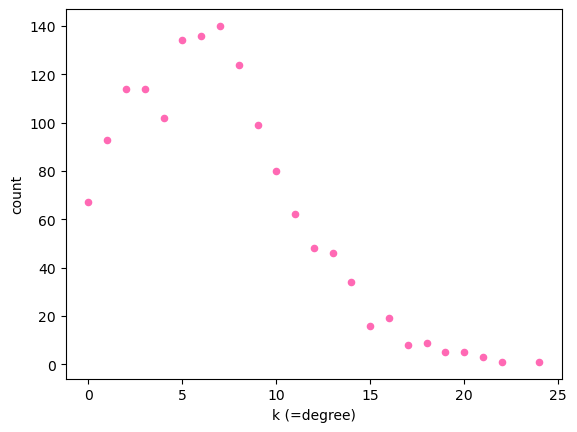

In [17]:
#create a scatterplot of the degree distribution where the x-axis is "k" and the y-axis is "count" using the pandas plot function (documentation provided)

df.plot.scatter(x='k (=degree)', y='count', c='hotpink')
#df.plot(kind = "scatter", x = "k (=degree)", y = "count", color = "crimson") #Alternative way

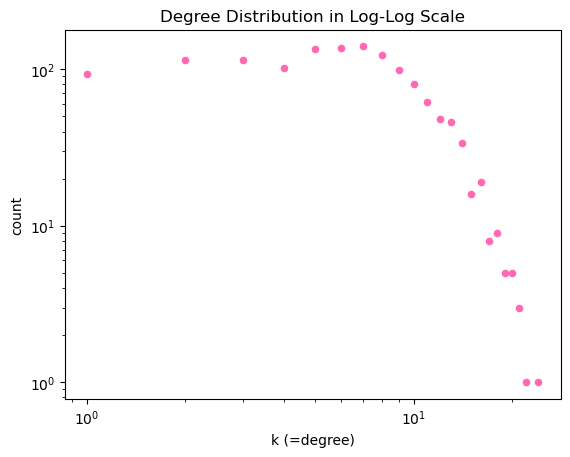

In [26]:
# repeat, but this time set the parameter "loglog" to be True to get the plot in log-log scale
df.plot(kind = "scatter", x = "k (=degree)", y = "count", color = "hotpink", loglog = True)

# plt.xlabel('Degree (k)')
# plt.ylabel('Count')
plt.title('Degree Distribution in Log-Log Scale')
plt.show()

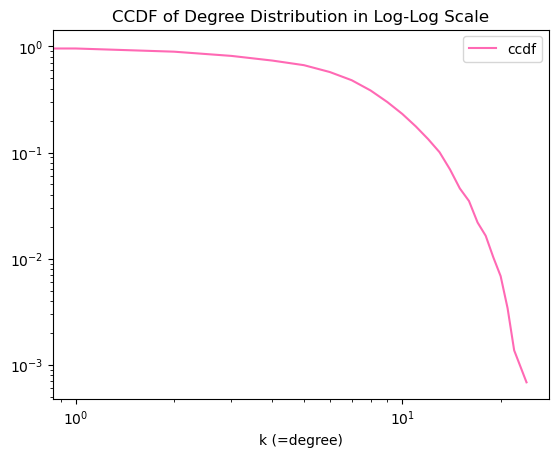

In [34]:
ccdf = df.sort_values(by = "k (=degree)", ascending = False)

#create a new column in the dataframe holding the cumulative sum - use the "cumsum" function in the provided pandas documentation
ccdf['cumulative sum'] = ccdf['count'].cumsum()

#normalize by the total degree sum, so that the count becomes a probability. Save this in a column called "ccdf".
ccdf['ccdf']=ccdf['cumulative sum']/ccdf['count'].sum()

#sort again in ascending order - I think it is kinda unnecessary no?
ccdf = ccdf[["k (=degree)", "ccdf"]].sort_values(by = "k (=degree)")

##plot the CCDF in log-log scale to see the result using the same method as for the log-log plot above, except now it's a line-plot, not a scatterplot, and the y-axis should be "ccdf"
ccdf.plot(kind = "line", x ="k (=degree)", y = "ccdf", color = "hotpink", loglog = True)
plt.title('CCDF of Degree Distribution in Log-Log Scale')
plt.show()

## Calculate the global, average and local clustering coefficient.

In [ ]:
global_clustering = nx.transitivity(G)
print(f'Global clustering: {global_clustering}')

average_clustering = nx.average_clustering(G)
print(f'Average clustering: {average_clustering}')

local_clustering = nx.clustering(G)
print(f'Local clustering (first 5 nodes): {dict(list(local_clustering.items())[:5])}')

Global clustering: 0.17545337429392527
Average clustering: 0.13082627244585704
Local clustering (first 5 nodes): {0: 0.35294117647058826, 1: 0, 2: 0, 3: 0, 4: 0}


## Cliques?

In [ ]:
# maximal_cliques = list(nx.find_cliques(G)) - this does not work for directed graphs

# # Option one
# size_largest_clique = max(len(clique) for clique in maximal_cliques)
# print("Largest maximal clique size (option one): ", size_largest_clique)

# # Option two
# size_largest_clique = max(nx.node_clique_number(G).values())
# print("Largest maximal clique size (option two): ", size_largest_clique)

# # Listing nodes that are part of the largest clique
# for clique in maximal_cliques:
#     if len(clique) == size_largest_clique:
#         print(clique)

## Shortest Paths

In [52]:
# Suppose G is your directed graph
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

nodes = list(G.nodes())
num_nodes = len(nodes)
shortest_paths_matrix = np.full((num_nodes, num_nodes), np.inf)  # fill with ∞

for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        if v in shortest_paths[u]:
            shortest_paths_matrix[i, j] = shortest_paths[u][v]

shortest_paths_matrix

array([[ 0.,  8., inf, ..., 14., 10., 12.],
       [ 7.,  0., inf, ..., 14., 12., 12.],
       [ 8.,  6.,  0., ..., 13., 10., 11.],
       ...,
       [10.,  7., inf, ...,  0.,  5.,  6.],
       [ 9.,  9., inf, ..., 14.,  0.,  2.],
       [ 9.,  9., inf, ..., 13.,  3.,  0.]])

In [44]:
avg_shortest_path_length = np.nanmean(np.where(shortest_paths_matrix != np.inf, shortest_paths_matrix, np.nan))
print(f'Average shortest path length: {avg_shortest_path_length}')

Average shortest path length: 8.382810205012781


## Diameter

#### Diameter of the largest strongly connected component (SCC)

- This gives the maximum shortest-path length among nodes that can reach each other.

In [46]:
# Get largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc).copy()

diameter = nx.diameter(G_scc)
print("Diameter (largest SCC):", diameter)

Diameter (largest SCC): 22


#### Diameter of the weakly connected component

- Treats the graph as undirected (ignores edge direction):

In [48]:
largest_wcc = max(nx.weakly_connected_components(G), key=len)
G_wcc = G.subgraph(largest_wcc).copy()

diameter_undirected = nx.diameter(G_wcc.to_undirected())
print("Diameter (weakly connected, undirected):", diameter_undirected)

Diameter (weakly connected, undirected): 13


#### Directed “effective diameter”

If your graph is not strongly connected, you can measure the longest finite shortest path among reachable pairs only.

“The longest geodesic distance among all pairs that can reach each other, possibly in different SCCs.”

In [51]:
lengths = dict(nx.all_pairs_shortest_path_length(G))
finite_lengths = [
    d for src in lengths for d in lengths[src].values()
]
effective_diameter = max(finite_lengths)
print("Directed diameter (reachable pairs only):", effective_diameter)


Directed diameter (reachable pairs only): 22


## Node ranking

### Most central node

What's the most central node in this networkaccording to PageRank? 

How does PageRank compares with the in-degree? (for instance, you could calculate the Spearman and/or Pearson correlation between the two)

In [55]:
pagerank = nx.pagerank(G)
print(pagerank)

# Find the node with the maximum value
most_central = max(pagerank, key = pagerank.get)
print("Most central node: %s (PR = %1.4f)" % (most_central, pagerank[most_central]))

{0: 0.0007252229386261771, 1: 0.001334889072555182, 2: 0.0001685770809022387, 3: 0.0012690960561789904, 4: 0.0001685770809022387, 5: 0.0007780694838649535, 6: 0.0014046186289456894, 7: 0.0001685770809022387, 8: 0.0012252826565947058, 9: 0.0001685770809022387, 10: 0.00047750026386639396, 11: 0.000647153064264745, 12: 0.0002454236781592865, 13: 0.0006889942050537727, 14: 0.0007472178331678531, 15: 0.0002590894704837496, 16: 0.0001685770809022387, 17: 0.00034447506041170825, 18: 0.0007629153761014305, 19: 0.0009034034550550405, 20: 0.0019434314011297635, 21: 0.0016122109282090686, 22: 0.0019866688357068688, 23: 0.00018649112929912696, 24: 0.0005434181921693924, 25: 0.0014218504234913946, 26: 0.0004656756616260093, 27: 0.0008054309217482116, 28: 0.0006619644145035368, 29: 0.00025473029572746644, 30: 0.0009048771224936508, 31: 0.00026409664034961406, 32: 0.0009134829708708584, 33: 0.00028152762222649207, 34: 0.00029227435078344225, 35: 0.0012904413494952294, 36: 0.0005493883417994694, 37: 0

In [56]:
# Let's get all the in-degrees 
degree = dict(G.in_degree)
pagerank_np = np.array([pagerank[v] for v in G.nodes])
degree_np = np.array([degree[v] for v in G.nodes])

print(degree)
print(pagerank_np)
print(degree_np)

{0: 6, 1: 7, 2: 0, 3: 5, 4: 0, 5: 3, 6: 7, 7: 0, 8: 10, 9: 0, 10: 5, 11: 3, 12: 1, 13: 6, 14: 6, 15: 1, 16: 0, 17: 3, 18: 2, 19: 4, 20: 7, 21: 7, 22: 10, 23: 1, 24: 2, 25: 11, 26: 5, 27: 4, 28: 4, 29: 2, 30: 4, 31: 1, 32: 5, 33: 2, 34: 2, 35: 4, 36: 2, 37: 0, 38: 2, 39: 5, 40: 2, 41: 3, 42: 3, 43: 4, 44: 0, 45: 2, 46: 5, 47: 6, 48: 4, 49: 4, 50: 3, 51: 4, 52: 7, 53: 4, 54: 8, 55: 7, 56: 0, 57: 1, 58: 1, 59: 4, 60: 7, 61: 7, 62: 0, 63: 2, 64: 2, 65: 3, 66: 7, 67: 2, 68: 8, 69: 0, 70: 6, 71: 5, 72: 2, 73: 4, 74: 9, 75: 2, 76: 2, 77: 0, 78: 2, 79: 0, 80: 1, 81: 5, 82: 0, 83: 3, 84: 4, 85: 1, 86: 2, 87: 0, 88: 5, 89: 1, 90: 8, 91: 2, 92: 1, 93: 3, 94: 1, 95: 2, 96: 2, 97: 6, 98: 9, 99: 2, 100: 4, 101: 0, 102: 3, 103: 2, 104: 2, 105: 1, 106: 0, 107: 2, 108: 7, 109: 2, 110: 4, 111: 2, 112: 2, 113: 4, 114: 3, 115: 5, 116: 9, 117: 2, 118: 0, 119: 3, 120: 3, 121: 6, 122: 2, 123: 0, 124: 2, 125: 2, 126: 2, 127: 1, 128: 2, 129: 2, 130: 8, 131: 4, 132: 1, 133: 2, 134: 9, 135: 1, 136: 3, 137: 3, 13

In [58]:
from scipy.stats import linregress, pearsonr, spearmanr
# Calculate the spearman and pearson correlation
r, p = pearsonr(pagerank_np, degree_np)
print("Pearson correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

r, p = spearmanr(pagerank_np, degree_np)
print("Spearman correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

Pearson correlation between PR and in-degree: 0.8243 (p-value = 0.0000)
Spearman correlation between PR and in-degree: 0.8902 (p-value = 0.0000)


### Most authoritative node and the best hub

The HITS algorithm computes two numbers for a node:
- **Hubs** estimates the node value based on **outgoing links**.
- **Authorities** estimates the node value based on the **incoming links**.

In our context I guess hub = social butterfly, Authority = popular person

In [ ]:
# Calculate HITS (Hubs and Authorities)
hits = nx.hits(G)

print(hits[0]) # Hubs
print(hits[1]) # Authorities

{0: 7.456775151318531e-07, 1: 9.728665513354502e-07, 2: 1.299580314091539e-05, 3: -0.0, 4: 2.723927537050475e-06, 5: 1.7432730803084526e-05, 6: 0.00019588068225510628, 7: 2.2241325544877814e-06, 8: 5.1689759300391286e-05, 9: -0.0, 10: 7.184352191488628e-06, 11: 9.553862723678473e-07, 12: 4.5403511791033747e-07, 13: 4.5525578394185904e-07, 14: 1.8679931895894821e-06, 15: 1.387984104011045e-06, 16: -0.0, 17: 7.426929557342282e-05, 18: 1.880381334614378e-06, 19: 1.5401847014498335e-05, 20: 9.540056490435436e-06, 21: 6.074221808474762e-05, 22: 1.2270166852560107e-05, 23: 2.2877323149723466e-06, 24: -0.0, 25: 1.6400265447874567e-05, 26: 0.00010288497465214733, 27: 9.338103268978714e-06, 28: 0.00012492425549255251, 29: 1.7913127349224738e-07, 30: -0.0, 31: 8.597594349265634e-07, 32: 1.0555274403691885e-06, 33: 4.21166603045398e-06, 34: 2.0323799838110206e-06, 35: 0.00012405255309273845, 36: 3.492191974874167e-05, 37: -0.0, 38: -0.0, 39: 1.7562988245109835e-05, 40: 2.2842785557277213e-06, 41:

In [ ]:
# Find the nodes with the maximum values, meaning the the best hub and best authority
best_hub = max(hits[0], key=hits[0].get)   # Hubs
best_auth = max(hits[1], key=hits[1].get)  # Authorities

print(f"Best Hub: {best_hub}")
print(f"Best Authority: {best_auth}\n")

#Print their scores as well
print(f"Best Hub score: {hits[0][best_hub]:.4f}")
print(f"Best Authority score: {hits[1][best_auth]:.4f}")    

#the popularity/recognition of Node 1074 (authority) is stronger than the “connectivity activity” of Node 1354 (hub) in the network.

Best Hub: 1354
Best Authority: 1074

Best Hub score: 0.0334
Best Authority score: 0.0544


## Calculate the k-core decomposition
What's the highest core number in the network? 
How many nodes are part of the maximum core?

In [64]:
kcore = nx.core_number(G)

# Store the maximum core number
highest_core = max(kcore.values())
print(highest_core)

# How many nodes are part of the maximum core?
print("# of nodes in the maximum core: %d" % (len([v for v in kcore if kcore[v] == highest_core])))

8
# of nodes in the maximum core: 35


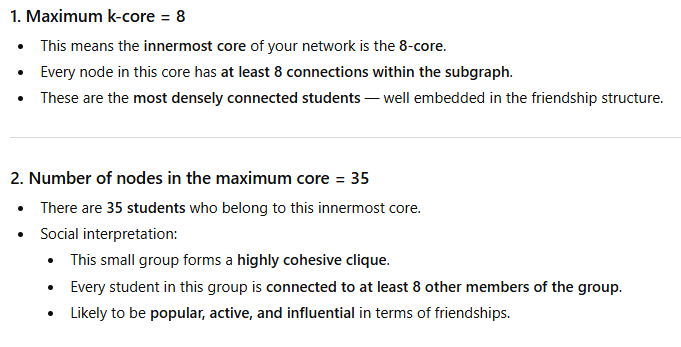

## Clustering Coefficient - unsure about this

In [66]:
G_cc = nx.transitivity(G)
print(G_cc)

all_possible_edges = len(G.nodes) * (len(G.nodes) - 1) / 2 # we subtract one due to no self-loops
p = len(G.edges) / all_possible_edges

print(p)

0.17545337429392527
0.004552752401250622


## If graph would be undirected:

In [47]:
G_undirected = G.to_undirected()

print (f'Number of edges: {G_undirected.number_of_edges()}')
print (f'Number of nodes: {G_undirected.number_of_nodes()}')
print (f'Average degree: {np.mean([k for n,k in G_undirected.degree()]) }')

if nx.is_connected(G_undirected):
    diameter = nx.diameter(G_undirected)
    print(f"Diameter: {diameter}")
else:
    print("Graph is not connected.")
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    G_lcc = G_undirected.subgraph(largest_cc)
    print(f"Diameter of largest connected component: {nx.diameter(G_lcc)}")


#For Simple Graph: 
# Number of edges: 3875
# Number of nodes: 1460
# Average degree: 5.308219178082192

Number of edges: 3875
Number of nodes: 1460
Average degree: 5.308219178082192
Graph is not connected.
Diameter of largest connected component: 13


In [44]:
#Clustering:
print(f"Average clustering coefficient: {np.mean(list(nx.clustering(G_undirected).values())):.4f}")

Average clustering coefficient: 0.1629


## Implementing SI model

In [ ]:
def si(G, i_nodes, beta):
    '''
    # A function to make the simple SI step. Loop over all neighbors of nodes in I and transition them to I with probability beta.
    '''
   new_infected = i_nodes.copy()
   s_neighbors_of_i = {n for i_node in i_nodes for n in G.neighbors(i_node)}
   for s_node in s_neighbors_of_i:
      if random.random() < beta:
         new_infected.add(s_node)
   return new_infected

In [ ]:
# Run the model for different beta values
for beta in (0.05, 0.1, 0.2):
   # Run it 10 times for each beta value
   ts_to_infect = []
   for _ in range(10):
      # Pick the initial infected set
      i_nodes = set(random.sample(set(G.nodes), 1))
      # Run until we infected the entire network
      t = 0
      while (len(i_nodes) / len(G.nodes)) < 0.8:
         i_nodes = si(G, i_nodes, beta)
         t += 1
      ts_to_infect.append(t)
   print("Beta = %1.2f, avg steps to 80%% infection: %1.2f" % (beta, sum(ts_to_infect) / len(ts_to_infect)))